# EDA



## import required packages

In [2]:
import numpy as np
import math
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style('whitegrid')
  
import glob
import folium
#import dask.dataframe as dd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print('imports ok')

imports ok


### read ArcGIS derived file showing distances (m) of presence observations to nearest Lake shoreline

In [3]:

dist = '../greatlakes/observations_to_shore_distances.csv'
dfdist = pd.DataFrame()
dfdist = pd.read_csv(dist, encoding="ISO-8859-1")
print(dist + " read")

dfdist.info()
dfdist.describe()


../greatlakes/observations_to_shore_distances.csv read
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 10 columns):
OBJECTID      2651 non-null int64
IN_FID        2651 non-null int64
NEAR_FID      2651 non-null int64
NEAR_DIST     2651 non-null float64
NEAR_RANK     2651 non-null int64
FROM_X        2651 non-null float64
FROM_Y        2651 non-null float64
NEAR_X        2651 non-null float64
NEAR_Y        2651 non-null float64
NEAR_ANGLE    2651 non-null float64
dtypes: float64(6), int64(4)
memory usage: 207.2 KB


,OBJECTID,IN_FID,NEAR_FID,NEAR_DIST,NEAR_RANK,FROM_X,FROM_Y,NEAR_X,NEAR_Y,NEAR_ANGLE
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.0,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000
mean,1326.000000,28941.717088,7680.984911,199.275466,1.0,-84.116729,44.138129,-84.116881,44.138641,-7.049306
std,765.422106,13034.662817,6890.065403,359.338479,0.0,3.239328,1.540841,3.238750,1.541161,83.545169
min,1.000000,1.000000,198.000000,0.004819,1.0,-92.147533,41.475917,-92.094395,41.474354,-179.999992
25%,663.500000,19353.500000,3112.000000,50.889688,1.0,-86.342695,42.790592,-86.343372,42.789998,-47.495404
50%,1326.000000,29021.000000,5568.000000,130.589006,1.0,-84.953003,44.256983,-84.952006,44.257957,-13.072808
75%,1988.500000,42552.000000,7477.000000,147.754357,1.0,-82.142544,44.732132,-82.143406,44.731726,43.005303
max,2651.000000,49322.000000,46262.000000,7852.895004,1.0,-76.195464,46.783240,-76.196535,46.779289,177.518952


### determine percentiles 
### outliers determined by using rule of thumb; > one and half times the interquartile range above the median.
### therfore outliers are more than 276m from the shoreline.
### why? a cut-off is required to extract absence data within the range that Piping Plovers can be seen.
### for future development: extract data based on spectral analyis to determine beach and sand dune areas.

In [4]:
print(dfdist.NEAR_DIST.quantile([0.05, 0.25,0.5,0.75, 0.95]))
a, b, c, d, e = dfdist.NEAR_DIST.quantile([0.05, 0.25,0.5,0.75, 0.95])

# compute outliers limit
o = c+1.5*(d-b)
print("Assume outliers are over: ",round(o))


0.05      5.723936
0.25     50.889688
0.50    130.589006
0.75    147.754357
0.95    834.246446
Name: NEAR_DIST, dtype: float64
Assume outliers are over:  276


### distribution of Piping Plovers from the shoreline 

C:\Users\Wayne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AxesSubplot(0.125,0.125;0.775x0.755)


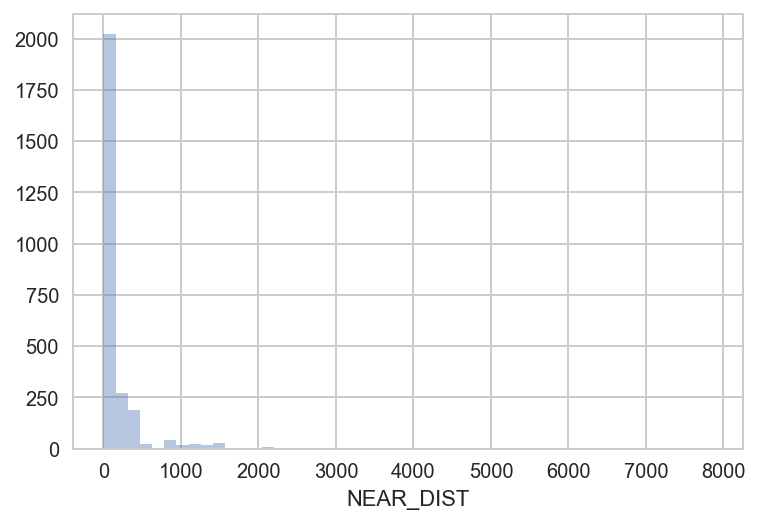

In [5]:
a = sns.distplot(dfdist["NEAR_DIST"], kde=False, bins=50)
print(a)


### remove the outliers; one and half times the interquartile range above the median.

### histogram shows distribution with outliers removed. Median is 130m with a sharp decline more than 150m

C:\Users\Wayne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AxesSubplot(0.125,0.125;0.775x0.755)


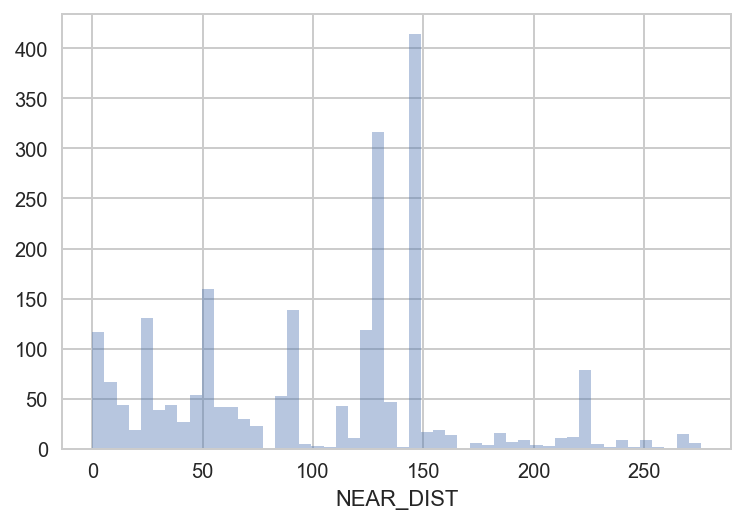

In [6]:

dfdist2 = dfdist[dfdist.NEAR_DIST < 276]

a = sns.distplot(dfdist2["NEAR_DIST"], kde=False, bins=50)
print(a)

##                  Great Lakes showing presence of Piping Plovers within 276m of shoreline (ArcGIS)

<img src="..\great_lakes.jpg"> 

### ArcGIS derived dataset for nearness to wetlands

In [7]:

w = '../greatlakes/observations_to_wetlands_distances.csv'
dfwet = pd.DataFrame()
dfwet = pd.read_csv(w, encoding="ISO-8859-1")
print(w + " read")

dfwet.info()
dfwet.describe()

../greatlakes/observations_to_wetlands_distances.csv read
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 10 columns):
OBJECTID      2651 non-null int64
IN_FID        2651 non-null int64
NEAR_FID      2651 non-null int64
NEAR_DIST     2651 non-null float64
NEAR_RANK     2651 non-null int64
FROM_X        2651 non-null float64
FROM_Y        2651 non-null float64
NEAR_X        2651 non-null float64
NEAR_Y        2651 non-null float64
NEAR_ANGLE    2651 non-null float64
dtypes: float64(6), int64(4)
memory usage: 207.2 KB


,OBJECTID,IN_FID,NEAR_FID,NEAR_DIST,NEAR_RANK,FROM_X,FROM_Y,NEAR_X,NEAR_Y,NEAR_ANGLE
count,2651.000000,2651.000000,2651.000000,2651.000000,2651.0,2651.000000,2651.000000,2651.000000,2651.000000,2651.000000
mean,1326.000000,28941.717088,4803.571105,4004.070286,1.0,-84.116729,44.138129,-84.109241,44.141342,31.979625
std,765.422106,13034.662817,2155.620758,9078.695411,0.0,3.239328,1.540841,3.249390,1.538446,105.052346
min,1.000000,1.000000,98.000000,0.000000,1.0,-92.147533,41.475917,-92.135250,41.436363,-178.528362
25%,663.500000,19353.500000,2656.000000,112.276802,1.0,-86.342695,42.790592,-86.309102,42.671340,-69.596409
50%,1326.000000,29021.000000,5220.000000,334.870428,1.0,-84.953003,44.256983,-84.957269,44.256021,28.495622
75%,1988.500000,42552.000000,6816.000000,2610.011409,1.0,-82.142544,44.732132,-82.171593,44.731863,153.884933
max,2651.000000,49322.000000,7865.000000,63582.071244,1.0,-76.195464,46.783240,-76.194090,46.770084,179.395353


### histogram showing distribution of Piping Plovers observations distance to wetlands

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Wayne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


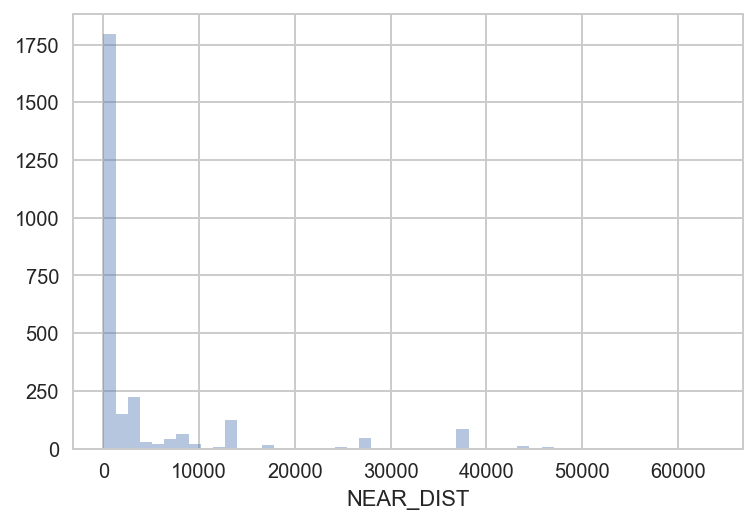

In [8]:
a = sns.distplot(dfwet["NEAR_DIST"], kde=False, bins=50)
print(a)

### determine percentiles and outliers as for shorline distances

In [9]:
print(dfwet.NEAR_DIST.quantile([0.05, 0.25,0.5,0.75, 0.95]))
a, b, c, d, e = dfwet.NEAR_DIST.quantile([0.05, 0.25,0.5,0.75, 0.95])

# computer outliers limit
o = c+1.5*(d-b)
print("Assume outliers are over: ",round(o))


0.05       32.935166
0.25      112.276802
0.50      334.870428
0.75     2610.011409
0.95    26947.655816
Name: NEAR_DIST, dtype: float64
Assume outliers are over:  4081


### distribution of Piping Plovers from wetlands with outliers greater than 4081m removed


C:\Users\Wayne\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AxesSubplot(0.125,0.125;0.775x0.755)


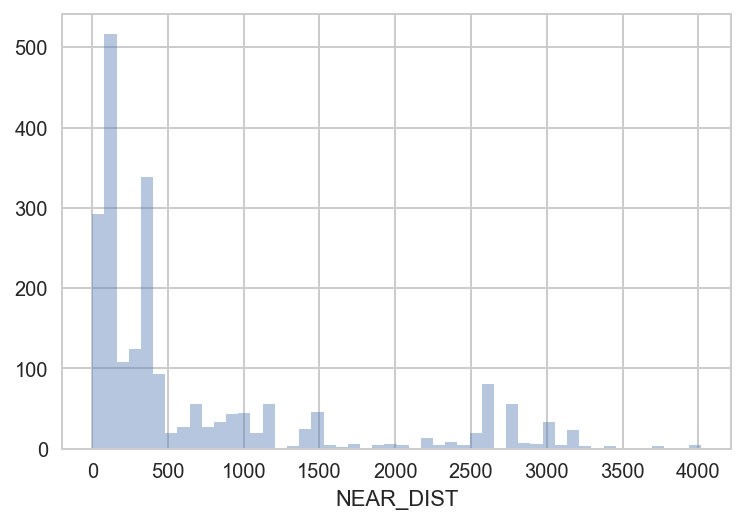

In [10]:

dfwet2 = dfwet[dfwet.NEAR_DIST < 4081]

a = sns.distplot(dfwet2["NEAR_DIST"], kde=False, bins=50)
print(a)

### boxplots showing distances from shorelines and wetlands 

C:\Users\Wayne\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


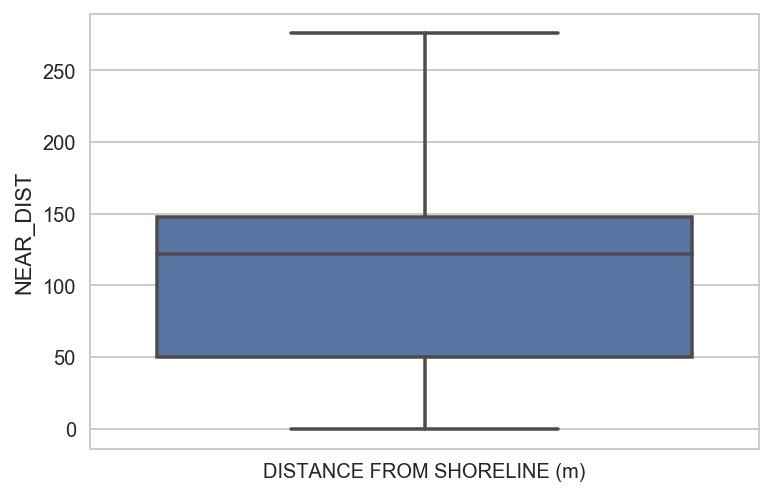

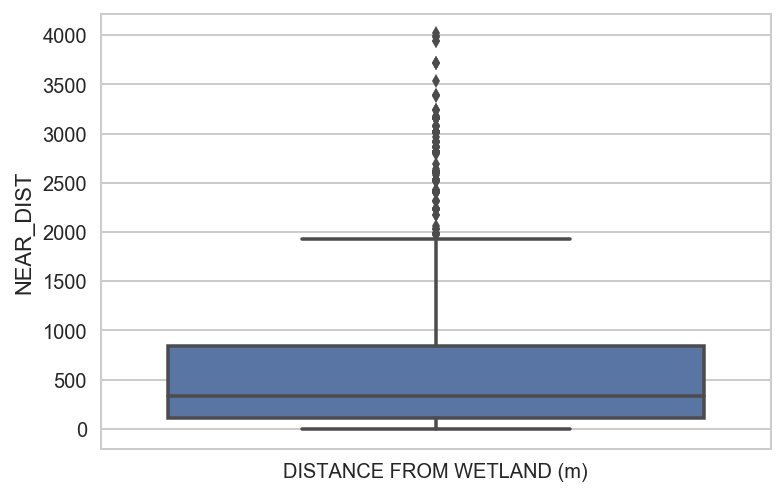

In [11]:
import seaborn as sns

sns.boxplot(y = 'NEAR_DIST', data = dfdist2)
plt.xticks([0], ['DISTANCE FROM SHORELINE (m)'])

plt.show()
sns.boxplot(y = 'NEAR_DIST', data = dfwet2)
plt.xticks([0], ['DISTANCE FROM WETLAND (m)'])


plt.show()


<img src="..\cap1.jpg"> 